In [ ]:
import pandas as pd
import numpy as np
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ANZ synthesised transaction dataset.xlsx to ANZ synthesised transaction dataset.xlsx


In [ ]:
df=pd.read_excel('ANZ synthesised transaction dataset.xlsx')
#df.info()

In [ ]:
df.merchant_state.value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

In [ ]:
df.drop(['bpay_biller_code','merchant_id','merchant_code','merchant_suburb','merchant_long_lat'],inplace=True,axis=1)

In [ ]:
df.drop(['account','currency','long_lat','first_name','transaction_id','country'],inplace=True,axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   txn_description    12043 non-null  object        
 3   balance            12043 non-null  float64       
 4   date               12043 non-null  datetime64[ns]
 5   gender             12043 non-null  object        
 6   age                12043 non-null  int64         
 7   merchant_state     7717 non-null   object        
 8   extraction         12043 non-null  object        
 9   amount             12043 non-null  float64       
 10  customer_id        12043 non-null  object        
 11  movement           12043 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 1.1+ MB


In [ ]:
a=df[['customer_id','amount']][df['txn_description']=='PAY/SALARY'].groupby(['customer_id']).sum()

In [ ]:
a['annual']=a['amount']*4

In [ ]:
a.drop('amount',inplace=True,axis=1)

In [ ]:
a.reset_index(inplace=True)

In [ ]:
df1=pd.merge(a,df,on='customer_id',how='left')

In [ ]:
df1.shape

(12043, 13)

In [ ]:
df1.head()

,customer_id,annual,status,card_present_flag,txn_description,balance,date,gender,age,merchant_state,extraction,amount,movement
0,CUS-1005756958,50464.44,authorized,1.0,POS,463.96,2018-08-02,F,53,QLD,2018-08-02T08:08:02.000+0000,6.48,debit
1,CUS-1005756958,50464.44,authorized,1.0,SALES-POS,424.01,2018-08-02,F,53,QLD,2018-08-02T21:36:42.000+0000,39.95,debit
2,CUS-1005756958,50464.44,authorized,1.0,POS,401.05,2018-08-03,F,53,NSW,2018-08-03T08:27:40.000+0000,22.96,debit
3,CUS-1005756958,50464.44,authorized,0.0,POS,391.94,2018-08-03,F,53,QLD,2018-08-03T09:15:59.000+0000,9.11,debit
4,CUS-1005756958,50464.44,authorized,1.0,SALES-POS,377.29,2018-08-03,F,53,QLD,2018-08-03T21:51:32.000+0000,14.65,debit


In [ ]:
df1.drop(['card_present_flag','merchant_state'],inplace=True,axis=1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12043 entries, 0 to 12042
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      12043 non-null  object        
 1   annual           12043 non-null  float64       
 2   status           12043 non-null  object        
 3   txn_description  12043 non-null  object        
 4   balance          12043 non-null  float64       
 5   date             12043 non-null  datetime64[ns]
 6   gender           12043 non-null  object        
 7   age              12043 non-null  int64         
 8   extraction       12043 non-null  object        
 9   amount           12043 non-null  float64       
 10  movement         12043 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 1.1+ MB


In [ ]:
df1['month']=df1['date'].dt.month

In [ ]:
month=pd.get_dummies(df1['month'])
month.columns=['month_8','month_9','month_10']

In [ ]:
df1[month.columns]=month

In [ ]:
movement=pd.get_dummies(df1['movement'])
df1[movement.columns]=movement

In [ ]:
status=pd.get_dummies(df1['status'])

In [ ]:
txn_des=pd.get_dummies(df['txn_description'])
df1[txn_des.columns]=txn_des

In [ ]:
status=pd.get_dummies(df1['status'])
df1[status.columns]=status

In [ ]:
gender=pd.get_dummies(df1['gender'])
df1[gender.columns]=gender

In [ ]:
df1.drop(['movement','month','status','txn_description','gender'],inplace=True,axis=1)

In [ ]:
df1.shape

(12043, 22)

In [ ]:
df1.drop(['date','extraction'],inplace=True,axis=1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12043 entries, 0 to 12042
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  12043 non-null  object 
 1   annual       12043 non-null  float64
 2   balance      12043 non-null  float64
 3   age          12043 non-null  int64  
 4   amount       12043 non-null  float64
 5   month_8      12043 non-null  uint8  
 6   month_9      12043 non-null  uint8  
 7   month_10     12043 non-null  uint8  
 8   credit       12043 non-null  uint8  
 9   debit        12043 non-null  uint8  
 10  INTER BANK   12043 non-null  uint8  
 11  PAY/SALARY   12043 non-null  uint8  
 12  PAYMENT      12043 non-null  uint8  
 13  PHONE BANK   12043 non-null  uint8  
 14  POS          12043 non-null  uint8  
 15  SALES-POS    12043 non-null  uint8  
 16  authorized   12043 non-null  uint8  
 17  posted       12043 non-null  uint8  
 18  F            12043 non-null  uint8  
 19  M   

In [ ]:
sum1=df1[['customer_id','month_8','month_9','month_10','credit','debit','INTER BANK','PAY/SALARY','PAYMENT','PHONE BANK','POS','SALES-POS','authorized','posted','amount']]
notadd=df1[['customer_id','annual','age','F','M']]

In [ ]:
sum11=sum1.groupby(['customer_id']).sum()

In [ ]:
sum11.head(1)

,month_8,month_9,month_10,credit,debit,INTER BANK,PAY/SALARY,PAYMENT,PHONE BANK,POS,SALES-POS,authorized,posted,amount
customer_id,,,,,,,,,,,,,,
CUS-1005756958,50.0,14.0,9.0,13.0,60.0,8.0,6.0,14.0,0.0,29.0,16.0,48.0,25.0,16268.97


In [ ]:
notadd.drop_duplicates(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
final=pd.merge(sum11,notadd,on='customer_id')

In [ ]:
final

,customer_id,month_8,month_9,month_10,credit,debit,INTER BANK,PAY/SALARY,PAYMENT,PHONE BANK,POS,SALES-POS,authorized,posted,amount,annual,age,F,M
0,CUS-1005756958,50.0,14.0,9.0,13.0,60.0,8.0,6.0,14.0,0.0,29.0,16.0,48.0,25.0,16268.97,50464.44,53,1,0
1,CUS-1117979751,43.0,25.0,32.0,7.0,93.0,6.0,7.0,27.0,1.0,29.0,30.0,52.0,48.0,33984.37,100202.20,21,0,1
2,CUS-1140341822,15.0,22.0,43.0,6.0,74.0,2.0,10.0,11.0,1.0,28.0,28.0,65.0,15.0,17010.60,45996.24,28,0,1
3,CUS-1147642491,29.0,39.0,50.0,13.0,105.0,7.0,9.0,29.0,1.0,33.0,39.0,76.0,42.0,28980.82,88992.28,34,1,0
4,CUS-1196156254,82.0,98.0,65.0,7.0,238.0,16.0,6.0,47.0,1.0,93.0,82.0,163.0,82.0,36050.72,109304.44,34,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,CUS-72755508,19.0,13.0,26.0,12.0,46.0,3.0,3.0,14.0,0.0,19.0,19.0,45.0,13.0,11438.37,34815.36,35,1,0
96,CUS-809013380,68.0,42.0,14.0,13.0,111.0,7.0,0.0,24.0,1.0,50.0,42.0,88.0,36.0,18810.09,53927.64,21,1,0
97,CUS-860700529,53.0,89.0,91.0,6.0,227.0,16.0,16.0,48.0,0.0,76.0,77.0,206.0,27.0,18099.88,43406.88,30,0,1
98,CUS-880898248,32.0,17.0,29.0,6.0,72.0,6.0,5.0,17.0,1.0,27.0,22.0,56.0,22.0,11462.45,34415.52,26,0,1


In [ ]:
final.drop(['customer_id'],inplace=True,axis=1)

In [ ]:
target=final['annual']

In [ ]:
target2=pd.DataFrame(target)

In [ ]:
target2

,annual
0,50464.44
1,100202.20
2,45996.24
3,88992.28
4,109304.44
...,...
95,34815.36
96,53927.64
97,43406.88
98,34415.52


In [ ]:
final.drop('annual',inplace=True,axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#model=LinearRegression()

model=DecisionTreeRegressor()
ss=StandardScaler()
target1=ss.fit_transform(target2[['annual']])

X_train,x_test,Y_train,y_test=train_test_split(final,target1,random_state=0,test_size=0.6)

model.fit(X_train,Y_train)
y_pred=model.predict(x_test)
print(r2_score(y_pred,y_test))
print(np.log(mean_squared_error(y_pred,y_test)))

0.8527227565664037
-1.9718353610187307


No handles with labels found to put in legend.


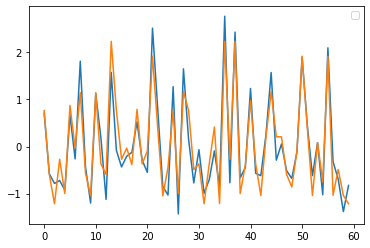

In [ ]:
plt.figure()
plt.plot(y_test)
plt.plot(y_pred)
plt.legend()

**CLUSTERING**

In [ ]:
from sklearn.cluster import KMeans
final223=final.copy()
final223['annual']=target2
model1=KMeans(n_clusters=3)
model1.fit(final223)
cluster1=model1.labels_
cluster1


array([2, 1, 2, 0, 1, 0, 2, 0, 2, 2, 1, 2, 2, 1, 0, 2, 2, 0, 2, 1, 0, 2,
       0, 2, 0, 2, 0, 1, 2, 0, 2, 0, 1, 0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2,
       1, 2, 2, 0, 1, 2, 1, 2, 2, 1, 2, 2, 1, 0, 2, 0, 0, 2, 1, 2, 0, 0,
       2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 1, 2, 2, 0,
       2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 1], dtype=int32)

In [ ]:
final223['cluster']=cluster1

In [ ]:
final223.groupby(['cluster']).sum()

,month_8,month_9,month_10,credit,debit,INTER BANK,PAY/SALARY,PAYMENT,PHONE BANK,POS,SALES-POS,authorized,posted,amount,age,F,M,annual
cluster,,,,,,,,,,,,,,,,,,
0,1076.0,1083.0,1128.0,252.0,3035.0,182.0,274.0,713.0,33.0,1028.0,1057.0,1972.0,1315.0,692896.13,793,12,16,2087939.36
1,806.0,855.0,826.0,163.0,2324.0,178.0,155.0,513.0,18.0,763.0,860.0,1292.0,1195.0,680314.77,630,7,12,2137309.20
2,2061.0,2075.0,2133.0,468.0,5801.0,382.0,454.0,1374.0,50.0,1992.0,2017.0,4453.0,1816.0,890073.30,1754,25,28,2481058.84


The Cluster 2 customers have spent more money in transactions than any other cluster.

They have the annual income of 2.4 million AUD 

In [ ]:
final223.groupby(['cluster']).mean()

,month_8,month_9,month_10,credit,debit,INTER BANK,PAY/SALARY,PAYMENT,PHONE BANK,POS,SALES-POS,authorized,posted,amount,age,F,M,annual
cluster,,,,,,,,,,,,,,,,,,
0,38.428571,38.678571,40.285714,9.000000,108.392857,6.500000,9.785714,25.464286,1.178571,36.714286,37.750000,70.428571,46.964286,24746.290357,28.321429,0.428571,0.571429,74569.262857
1,42.421053,45.000000,43.473684,8.578947,122.315789,9.368421,8.157895,27.000000,0.947368,40.157895,45.263158,68.000000,62.894737,35806.040526,33.157895,0.368421,0.631579,112489.957895
2,38.886792,39.150943,40.245283,8.830189,109.452830,7.207547,8.566038,25.924528,0.943396,37.584906,38.056604,84.018868,34.264151,16793.835849,33.094340,0.471698,0.528302,46812.430943


The cluster 1 customers have done more average transactions than cluster 0 and cluster 2.

The cluster 1 customers have more average transaction amount compared and also have very high average income than any other cluster(1,12,489) AUD.

Hence Cluster 1 customers are to be targeted.

In [ ]:
sum11.reset_index(inplace=True)

In [ ]:
final223['customer_id']=sum11['customer_id']

In [ ]:
final223['customer_id'][final223['cluster']==1]

1     CUS-1117979751
4     CUS-1196156254
10     CUS-134833760
13    CUS-1462656821
19    CUS-1617121891
27    CUS-1816693151
32    CUS-2031327464
37    CUS-2155701614
44    CUS-2376382098
48    CUS-2505971401
50     CUS-261674136
53    CUS-2663907001
56    CUS-2738291516
62    CUS-3142625864
67    CUS-3249305314
73    CUS-3336454548
84    CUS-4142663097
91     CUS-527400765
99     CUS-883482547
Name: customer_id, dtype: object

In [ ]:
len(final223['customer_id'][final223['cluster']==1])

19

There are 19 Customers who are to be targeted for sales strategy by bank ANZ

1     CUS-1117979751
4     CUS-1196156254
10     CUS-134833760
13    CUS-1462656821
19    CUS-1617121891
27    CUS-1816693151
32    CUS-2031327464
37    CUS-2155701614
44    CUS-2376382098
48    CUS-2505971401
50     CUS-261674136
53    CUS-2663907001
56    CUS-2738291516
62    CUS-3142625864
67    CUS-3249305314
73    CUS-3336454548
84    CUS-4142663097
91     CUS-527400765
99     CUS-883482547